In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_curve, classification_report
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")

In [ ]:
df['bmi'] = df['bmi'].apply(lambda x: 45 if x>45 else x)
df['avg_glucose_level'] = df['avg_glucose_level'].apply(lambda x: 160 if x>160 else x)

In [ ]:
#Fill in null values in BMI with median 
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [ ]:
#Transform object values to numeric to fit in data
le = LabelEncoder()

for i in df.columns[1:]:
  if(df[i].dtype == 'object'):
    df[i]=le.fit_transform(df[i])

In [ ]:
#Standardize the data before feeding to algorithm
scaler = StandardScaler()
df[['age', 'avg_glucose_level','bmi']] = scaler.fit_transform(df[['age','avg_glucose_level','bmi']])

In [ ]:
#standardize data part 2
df[['age', 'avg_glucose_level', 'bmi']] = df[['age', 'avg_glucose_level', 'bmi']].apply(lambda x: x/x.max(), axis=0)

In [ ]:
x = df.drop(['id'], axis=1)
y = df['stroke']

In [ ]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)

In [ ]:
#Handling imbalance dataset using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print('After OverSampling, the shape of train_X:{}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}\n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1':{}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0':{}".format(sum(y_train_res == 0)))



After OverSampling, the shape of train_X:(7786, 11)
After OverSampling, the shape of train_y: (7786,)

After OverSampling, counts of label '1':3893
After OverSampling, counts of label '0':3893


In [ ]:
#Building Logistric regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve

lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)
ypredTest = lr1.predict(X_test)
LogisticRegs, LogisticRegt, _ = roc_curve(y_test, ypredTest)
accuracyTest = accuracy_score(y_test, ypredTest)
print("accuracy for model on testing data is:", accuracyTest.round(4))
ypredTrain = lr1.predict(X_train_res)
accuracyTrain = accuracy_score(y_train_res, ypredTrain)
#print("accuracy for model on training data is:", accuracyTrain.round(2))

auc_roc = roc_auc_score(y_test, ypredTest)
print('AUC-ROC score:', auc_roc)

f_score = f1_score(y_test, ypredTest)
print('F-score :', f_score)

accuracy for model on testing data is: 1.0
AUC-ROC score: 1.0
F-score : 1.0


In [ ]:
#week 7: slide 94 Builing Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB();
nb.fit(X_train, y_train)
y_predNB = nb.predict(X_test)

accuracyTest2 = accuracy_score(y_test, y_predNB)
print("accuracy for model on testing data is:", accuracyTest2.round(2))
NaiveBr, NaiveBm, _ = roc_curve(y_test, y_predNB)
y_predTrain2 = nb.predict(X_train_res)
accuracyTrain2 = accuracy_score(y_train_res, y_predTrain2)
#print("accuracy for model on training data is:", accuracyTrain2.round(2))
f2_score = f1_score(y_test, y_predNB)
print('F-score:', f2_score)
auc_roc2 = roc_auc_score(y_test, y_predNB)
print('AUC-ROC score:', auc_roc2)

accuracy for model on testing data is: 1.0
F-score: 1.0
AUC-ROC score: 1.0


In [ ]:
#build K nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 5)
kn.fit(X_train_res, y_train_res)
y_predKNN = kn.predict(X_test)
KNearr, KNeart, _ = roc_curve(y_test, y_predKNN)
accuracyTest3 = accuracy_score(y_test, y_predKNN)
print("accuracy for model on testing data is:", accuracyTest3.round(3))

ypredTrain3 = kn.predict(X_train_res)
accuracyTrain3 = accuracy_score(y_train_res, ypredTrain3)
#print("accuracy for model on training data is:", accuracyTrain3.round(3))

f3_score = f1_score(y_test, y_predKNN)
auc_roc3 = roc_auc_score(y_test, y_predKNN)
print('AUC-ROC:', auc_roc3)
print('F-score:', f3_score)

accuracy for model on testing data is: 0.99
AUC-ROC: 0.9336355984083256
F-score: 0.9038461538461539


In [ ]:
from sklearn.svm import SVC

#Create a svm Classifier
clf = SVC()
#Train the model using the training sets
clf.fit(X_train_res, y_train_res)


y_predSVM = clf.predict(X_test)
SVectorr, SVectort, _ = roc_curve(y_test, y_predSVM)
accuracyTest4 = accuracy_score(y_test, y_predSVM)
print("accuracy for model on testing data is:", accuracyTest4.round(2))

ypredTrain4 = clf.predict(X_train_res)
accuracyTrain4 = accuracy_score(y_train_res, ypredTrain4)
#print("accuracy for model on training data is:", accuracyTrain4.round(2))

f4_score = f1_score(y_test, y_predSVM)
auc_roc4 = roc_auc_score(y_test, y_predSVM)
print('AUC-ROC score:', auc_roc4)
print('F-score:', f4_score)

accuracy for model on testing data is: 1.0
AUC-ROC score: 1.0
F-score: 1.0


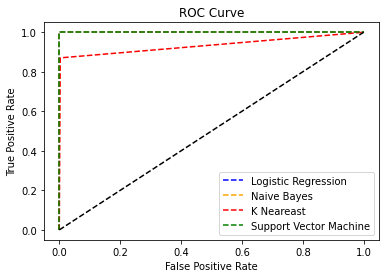

In [ ]:
plt.plot(LogisticRegs, LogisticRegt,linestyle="--", color='blue', label='Logistic Regression')
plt.plot(NaiveBr,NaiveBm,linestyle="--",color='orange', label="Naive Bayes")
plt.plot(KNearr,KNeart,linestyle="--",color='red', label="K Neareast")
plt.plot(SVectorr,SVectort,linestyle="--",color='green' ,label="Support Vector Machine")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Based on our ROC curve for all models, we can highlight that all of our 4 models using: K-Nearest Neighbor, Logistic Regression, SVM, and Naive Bayes is efficient for classification models. In an exception of K Nearest, the rest of the model informed us that they have an accurate predicting results of distinguishing between patients' with stroke or no stroke. Therefore, is very important to standardize our data before began fitting into testing and training. 